In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import time
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE
from scipy.stats import uniform
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

## Two datasets

1. Original unencoded. We would scale and encode in our own methods.

2. Encoded numerical. We would use it as a comparison.

In [4]:
df_original = pd.read_csv("Drug_Consumption.csv")
df_quantified = pd.read_csv("Drug_Consumption_Quantified.csv")

print("Shape of original dataset: ", df_original.shape)
print("Shape of quantified dataset: ", df_quantified.shape)

Shape of original dataset:  (1884, 32)
Shape of quantified dataset:  (1884, 32)


## Quantified dataset preprocess

In [8]:
df = df_quantified.drop(['ID'],axis=1)
df = df[df['Semer']=='CL0']
df = df.drop(['Semer'],axis=1)
print(df.shape)

(1876, 30)


In [9]:
drugs_to_ignore = ['Amphet', 'Amyl', 'Benzos', 'Ketamine', 'Legalh', 'Meth', 'VSA']
drugs_to_consider = ['Alcohol', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'LSD', 'Mushrooms', 'Nicotine']

In [10]:
non_alcohol_feature = drugs_to_ignore + ['Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'LSD', 'Mushrooms', 'Nicotine']
non_caff_features = drugs_to_ignore + ['Alcohol', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'LSD', 'Mushrooms', 'Nicotine']
non_cannabis_features = drugs_to_ignore + ['Alcohol', 'Caff', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'LSD', 'Mushrooms', 'Nicotine']
non_choc_features = drugs_to_ignore + ['Alcohol', 'Caff', 'Cannabis', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'LSD', 'Mushrooms', 'Nicotine']
non_coke_features = drugs_to_ignore + ['Alcohol', 'Caff', 'Cannabis', 'Choc', 'Crack', 'Ecstasy', 'Heroin', 'LSD', 'Mushrooms', 'Nicotine']
non_crack_features = drugs_to_ignore + ['Alcohol', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Ecstasy', 'Heroin', 'LSD', 'Mushrooms', 'Nicotine']
non_ecstasy_features = drugs_to_ignore + ['Alcohol', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Heroin', 'LSD', 'Mushrooms', 'Nicotine']
non_heroin_features = drugs_to_ignore + ['Alcohol', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'LSD', 'Mushrooms', 'Nicotine']
non_lsd_features = drugs_to_ignore + ['Alcohol', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Mushrooms', 'Nicotine']
non_mushrooms_features = drugs_to_ignore + ['Alcohol', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'LSD', 'Nicotine']
non_nicotine_features = drugs_to_ignore + ['Alcohol', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'LSD', 'Mushrooms']

In [11]:
drug_enc=OrdinalEncoder(categories=[["CL0","CL1","CL2","CL3","CL4","CL5","CL6"]])
for feature in drugs_to_consider:
    df[feature]=drug_enc.fit_transform(df[feature].to_numpy().reshape(-1,1))

In [12]:
df_quan_alcohol = df.drop(non_alcohol_feature, axis = 1)

df_quan_caff = df.drop(non_caff_features, axis = 1)

df_quan_cannabis = df.drop(non_cannabis_features, axis = 1)

df_quan_choc = df.drop(non_choc_features, axis = 1)

df_quan_coke = df.drop(non_coke_features, axis = 1)

df_quan_crack = df.drop(non_crack_features, axis = 1)

df_quan_ecstasy = df.drop(non_ecstasy_features, axis = 1)

df_quan_heroin = df.drop(non_heroin_features, axis = 1)

df_quan_lsd = df.drop(non_lsd_features, axis = 1)

df_quan_mushrooms = df.drop(non_mushrooms_features, axis = 1)

df_quan_nicotine = df.drop(non_nicotine_features, axis = 1)

In [13]:
df_quan_nicotine.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS,Nicotine
0,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,4.0
1,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0.0
2,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,2.0
3,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,2.0
4,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,6.0


## Original dataset preprocess

In [14]:
df1 = df_original.drop(['ID'],axis=1)
df1 = df1[df1['Semer']=='CL0']
df1 = df1.drop(['Semer'],axis=1)
df1 = df1.drop(drugs_to_ignore,axis=1)
df1.shape

(1876, 23)

In [15]:
numerical_feature = ['Nscore','Escore','Oscore','AScore','Cscore','Impulsive','SS']
nominal_cat_feature=["Gender","Country","Ethnicity"] ##apply onehot encoder to encode nominal categorical features

## apply ordinalecoder to encode ordinal categorical features and target values.
age_enc=OrdinalEncoder(categories=[["18-24","25-34","35-44","45-54","55-64","65+"]])
edu_enc=OrdinalEncoder(categories=[["Left school before 16 years","Left school at 16 years","Left school at 17 years","Left school at 18 years","Some college or university, no certificate or degree","Professional certificate/ diploma","University degree","Masters degree","Doctorate degree"]])
drug_enc=OrdinalEncoder(categories=[["CL0","CL1","CL2","CL3","CL4","CL5","CL6"]])

## ordinal encoder seems not encode multiple varibles at same time, so encode targets values one by one first.
for feature in drugs_to_consider:
    df1[feature] = drug_enc.fit_transform(df1[feature].to_numpy().reshape(-1,1))

preprocess=make_column_transformer((StandardScaler(),numerical_feature),
                                   (age_enc,["Age"]),
                                   (edu_enc, ["Education"]),
                                   (OneHotEncoder(handle_unknown="ignore",drop='first'),nominal_cat_feature),
                                   remainder="passthrough")
df_trans = preprocess.fit_transform(df1)

In [16]:
df_trans.shape

(1876, 33)

In [17]:
df_ori_X = df_trans[:,:22]
df_ori_X.shape

(1876, 22)

In [18]:
df_ori_alcohol = np.c_[df_ori_X,df_trans[:,22]]

df_ori_caff = np.c_[df_ori_X,df_trans[:,23]]

df_ori_cannabis = np.c_[df_ori_X,df_trans[:,24]]

df_ori_choc = np.c_[df_ori_X,df_trans[:,25]]

df_ori_coke = np.c_[df_ori_X,df_trans[:,26]]

df_ori_crack = np.c_[df_ori_X,df_trans[:,27]]

df_ori_ecstasy = np.c_[df_ori_X,df_trans[:,28]]

df_ori_heroin = np.c_[df_ori_X,df_trans[:,29]]

df_ori_lsd = np.c_[df_ori_X,df_trans[:,30]]

df_ori_mushrooms = np.c_[df_ori_X,df_trans[:,31]]

df_ori_nicotine = np.c_[df_ori_X,df_trans[:,32]]

In [19]:
df_ori_alcohol.shape

(1876, 23)

## modelling

In [20]:
def split(df_X, df_Y):
    X_dev, X_test, y_dev, y_test = train_test_split(df_X, df_Y, test_size=0.2, random_state=42)
    return X_dev,X_test,y_dev,y_test

In [21]:
quantified_df = [df_quan_alcohol, df_quan_caff, df_quan_cannabis, df_quan_choc, df_quan_coke, df_quan_crack,\
                  df_quan_ecstasy, df_quan_heroin, df_quan_lsd, df_quan_mushrooms, df_quan_nicotine]
original_df = [df_ori_alcohol, df_ori_caff, df_ori_cannabis, df_ori_choc, df_ori_coke, df_ori_crack,\
                  df_ori_ecstasy, df_ori_heroin, df_ori_lsd, df_ori_mushrooms, df_ori_nicotine]

In [22]:
df_quan_choc['Choc'].value_counts()

6.0    805
5.0    679
4.0    295
3.0     53
0.0     32
2.0     10
1.0      2
Name: Choc, dtype: int64

## Logistic Regression Classifier

In [32]:
for i in range(11):
    print(drugs_to_consider[i])
    ori_df = original_df[i]
    ori_df_X = ori_df[:,:22]
    ori_df_y = ori_df[:,-1]
    # train_test split
    X_dev_ori,X_test_ori,y_dev_ori,y_test_ori = split(ori_df_X, ori_df_y)
    
    # scale
    scaler_ori = StandardScaler()
    X_dev_ori = scaler_ori.fit_transform(X_dev_ori)
    X_test_ori = scaler_ori.transform(X_test_ori)
    
    # SMOTE on dev data
    try:
        X_dev_ori, y_dev_ori = SMOTE(random_state=42).fit_resample(X_dev_ori, y_dev_ori)
    except ValueError:
        1

    # cv
    log_hyperpara_dict = dict(C=uniform(loc=0.00001,scale=4.99999))
    log_gdcv = RandomizedSearchCV(LogisticRegression(random_state=0,max_iter=1000,\
                                               class_weight='balanced'),log_hyperpara_dict,cv=10)
    log_gd_search = log_gdcv.fit(X_dev_ori,y_dev_ori)
    print(log_gd_search.best_params_['C'])
    
    # fit best hyper params
    logistic_ori = LogisticRegression(C = log_gd_search.best_params_['C'], \
                                      random_state = 0,max_iter=1000,class_weight='balanced')
    logistic_ori.fit(X_dev_ori,y_dev_ori)
    print("original dataset")
    print('train acc',logistic_ori.score(X_dev_ori,y_dev_ori),'test acc',logistic_ori.score(X_test_ori,y_test_ori))
    
    # look into alcohol specific results
    if i == 0:
        y_test_ori_pred = logistic_ori.predict(X_test_ori)
        print('test confusion matrix\n',metrics.confusion_matrix(y_test_ori, y_test_ori_pred))
        print('test macro F1', metrics.f1_score(y_test_ori, y_test_ori_pred, average='macro'))
        print('test micro F1', metrics.f1_score(y_test_ori, y_test_ori_pred, average='micro'))
        print('test weighted F1', metrics.f1_score(y_test_ori, y_test_ori_pred, average='weighted'))

Alcohol
2.9061564178176327
original dataset
train acc 0.43211334120425027 test acc 0.22074468085106383
test confusion matrix
 [[ 3  2  0  0  1  1  0]
 [ 2  1  1  0  1  0  2]
 [ 0  0  2  5  1  1  3]
 [ 4  6  4 13  7  5  3]
 [ 6 11  8 13 10 15  1]
 [15 24  9 23 16 35 30]
 [ 8 20 11 10 13 11 19]]
test macro F1 0.17719972160315964
test micro F1 0.22074468085106383
test weighted F1 0.25386015020942554
Caff
4.407867913299512
original dataset
train acc 0.43996891594353066 test acc 0.1595744680851064
Cannabis
1.7325683827408933
original dataset
train acc 0.3705603788476717 test acc 0.34574468085106386
Choc


/Users/mayining/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


0.12334546993563433
original dataset
train acc 0.232 test acc 0.17287234042553193
Coke
4.543547401879243
original dataset
train acc 0.44391534391534393 test acc 0.35904255319148937
Crack


/Users/mayining/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


0.05324488301856358
original dataset
train acc 0.486 test acc 0.449468085106383
Ecstasy
4.6838195138838215
original dataset
train acc 0.4023542001070091 test acc 0.3776595744680851
Heroin
4.17042953158893
original dataset
train acc 0.547282120395328 test acc 0.5106382978723404
LSD
0.3160402074628069
original dataset
train acc 0.5786131996658312 test acc 0.4946808510638298
Mushrooms


/Users/mayining/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(


0.369829123993414
original dataset
train acc 0.42533333333333334 test acc 0.39361702127659576
Nicotine
4.564778248097625
original dataset
train acc 0.36075036075036077 test acc 0.2712765957446808


## Random Forest Classifier

In [19]:
n_estimators = [200, 300, 500, 1000]
max_features = [None, 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 100, num = 5)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
rf_random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [20]:
for i in range(11):
    print(drugs_to_consider[i])
    ori_df = original_df[i]
    ori_df_X = ori_df[:,:22]
    ori_df_y = ori_df[:,-1]
    # train_test split
    X_dev_ori,X_test_ori,y_dev_ori,y_test_ori = split(ori_df_X, ori_df_y)
    
    # SMOTE on dev data
    try:
        X_dev_ori, y_dev_ori = SMOTE(random_state=42).fit_resample(X_dev_ori, y_dev_ori)
    except ValueError:
        1

    rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(random_state = 42),\
                                   param_distributions = rf_random_grid,\
                                   n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)

    rf_random.fit(X_dev_ori, y_dev_ori)
    bp = rf_random.best_params_
    print(bp)

    rf_best = RandomForestClassifier(n_estimators = bp['n_estimators'], 
                                    min_samples_split = bp['min_samples_split'],
                                    min_samples_leaf = bp['min_samples_leaf'],
                                    max_features = bp['max_features'],
                                    max_depth = bp['max_depth'],
                                    bootstrap = bp['bootstrap'],
                                    random_state = 42)
    rf_best.fit(X_dev_ori, y_dev_ori)
    print("original dataset")
    print('train acc',rf_best.score(X_dev_ori,y_dev_ori),'test acc',rf_best.score(X_test_ori,y_test_ori))
    
    # look into alcohol specific results
    if i == 0:
        y_test_ori_pred = rf_best.predict(X_test_ori)
        print('test confusion matrix\n',metrics.confusion_matrix(y_test_ori, y_test_ori_pred))
        print('test macro F1', metrics.f1_score(y_test_ori, y_test_ori_pred, average='macro'))
        print('test micro F1', metrics.f1_score(y_test_ori, y_test_ori_pred, average='micro'))
        print('test weighted F1', metrics.f1_score(y_test_ori, y_test_ori_pred, average='weighted'))

Alcohol
Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 52, 'bootstrap': False}
original dataset
train acc 1.0 test acc 0.35106382978723405
test confusion matrix
 [[ 0  0  0  0  0  5  2]
 [ 0  0  1  0  1  4  1]
 [ 0  0  1  2  2  7  0]
 [ 1  1  2  5  6 17 10]
 [ 1  3  2  5 10 31 12]
 [ 1  1  5 13 13 85 34]
 [ 0  2  0  2  6 51 31]]
test macro F1 0.17879662506534993
test micro F1 0.35106382978723405
test weighted F1 0.33092873574521836
Caff
Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 52, 'bootstrap': False}
original dataset
train acc 1.0 test acc 0.699468085106383
Cannabis
Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 52, 'bootstrap

C:\Users\zhouj\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


{'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 5, 'bootstrap': True}
original dataset
train acc 0.56 test acc 0.4015957446808511
Coke
Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 52, 'bootstrap': False}
original dataset
train acc 0.9998236331569665 test acc 0.550531914893617
Crack
Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\zhouj\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': False}
original dataset
train acc 0.8633333333333333 test acc 0.8670212765957447
Ecstasy
Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 52, 'bootstrap': False}
original dataset
train acc 0.9998216515070447 test acc 0.5452127659574468
Heroin
Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 52, 'bootstrap': False}
original dataset
train acc 1.0 test acc 0.8138297872340425
LSD
Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 52, 'bootstrap': False}
original dataset
train acc 1.0 test acc 0.5718085106382979
Mushrooms
Fit

## Desicion Tree Classifier

In [23]:
max_features = [None, 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 100, num = 5)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
dt_random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [25]:
for i in range(11):
    print(drugs_to_consider[i])
    ori_df = original_df[i]
    ori_df_X = ori_df[:,:22]
    ori_df_y = ori_df[:,-1]
    # train_test split
    X_dev_ori,X_test_ori,y_dev_ori,y_test_ori = split(ori_df_X, ori_df_y)
    
    #SMOTE on dev data (some with smote have overfitting problem, therefore just apply smote to some datasets)
    if drugs_to_consider[i] in ("Choc","Crack","Mushrooms"):
        try:
            X_dev_ori, y_dev_ori = SMOTE(random_state=42).fit_resample(X_dev_ori, y_dev_ori)
        except ValueError:
            1

    dt_random = RandomizedSearchCV(estimator = DecisionTreeClassifier(random_state = 42),\
                                   param_distributions = dt_random_grid,\
                                   n_iter = 20, cv = 3, verbose=2, random_state=42, n_jobs = -1)

    dt_random.fit(X_dev_ori, y_dev_ori)
    bp = dt_random.best_params_
    print(bp)

    dt_best = DecisionTreeClassifier(min_samples_split = bp['min_samples_split'],
                                    min_samples_leaf = bp['min_samples_leaf'],
                                    max_features = bp['max_features'],
                                    max_depth = bp['max_depth'],
                                    random_state = 42)
    dt_best.fit(X_dev_ori, y_dev_ori)
    print("original dataset")
    print('train acc',dt_best.score(X_dev_ori,y_dev_ori),'test acc',dt_best.score(X_test_ori,y_test_ori))
    
    # look into alcohol specific results
    if i == 0:
        y_test_ori_pred = dt_best.predict(X_test_ori)
        print('test confusion matrix\n',metrics.confusion_matrix(y_test_ori, y_test_ori_pred))
        print('test macro F1', metrics.f1_score(y_test_ori, y_test_ori_pred, average='macro'))
        print('test micro F1', metrics.f1_score(y_test_ori, y_test_ori_pred, average='micro'))
        print('test weighted F1', metrics.f1_score(y_test_ori, y_test_ori_pred, average='weighted'))
    

Alcohol
Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5}
original dataset
train acc 0.438 test acc 0.3723404255319149
test confusion matrix
 [[  0   0   0   0   0   5   2]
 [  0   0   0   0   0   6   1]
 [  0   0   0   0   0  10   2]
 [  0   0   0   0   1  37   4]
 [  0   0   0   0   5  54   5]
 [  0   0   0   0   4 130  18]
 [  0   0   0   1   5  81   5]]
test macro F1 0.10735286848265792
test micro F1 0.3723404255319149
test weighted F1 0.2617900233205352
Caff
Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5}
original dataset
train acc 0.744 test acc 0.7180851063829787
Cannabis
Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 5}
original dataset
train acc 0.4493333333333333 test acc 0.361702127

/Users/mayining/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


original dataset
train acc 0.49866666666666665 test acc 0.4175531914893617
Coke
Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 5}
original dataset
train acc 0.5866666666666667 test acc 0.598404255319149
Crack
Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5}
original dataset
train acc 0.8686666666666667 test acc 0.8723404255319149
Ecstasy
Fitting 3 folds for each of 20 candidates, totalling 60 fits


/Users/mayining/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


{'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5}
original dataset
train acc 0.5673333333333334 test acc 0.5638297872340425
Heroin
Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5}
original dataset
train acc 0.856 test acc 0.8617021276595744
LSD
Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 5}
original dataset
train acc 0.6366666666666667 test acc 0.5904255319148937
Mushrooms
Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 5}
original dataset
train acc 0.5946666666666667 test acc 0.5452127659574468
Nicotine
Fitting 3 folds for each of 20 candidates, totalling 60 fits
{'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5}
origina

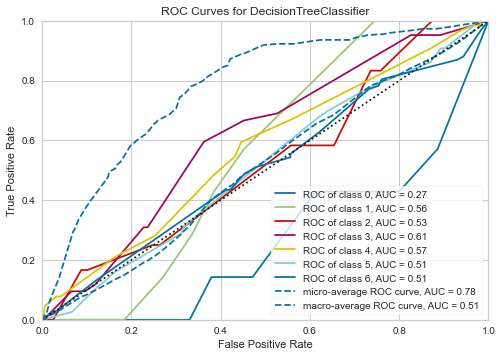

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [34]:
from yellowbrick.classifier import ROCAUC
dt_model=DecisionTreeClassifier(min_samples_split = 10,
                                    min_samples_leaf = 1,
                                    max_features = 'sqrt',
                                    max_depth = 5,
                                    random_state = 42)
visualizer = ROCAUC(dt_model, classes=["0", "1", "2","3","4","5","6"])
ori_df_X = df_ori_alcohol[:,:22]
ori_df_y = df_ori_alcohol[:,-1]
X_dev_ori,X_test_ori,y_dev_ori,y_test_ori = split(ori_df_X, ori_df_y)
visualizer.fit(X_dev_ori, y_dev_ori)        # Fit the training data to the visualizer
visualizer.score(X_test_ori, y_test_ori)        # Evaluate the model on the test data
visualizer.show()   

Text(0.5, 1.0, 'feature importance with DT')

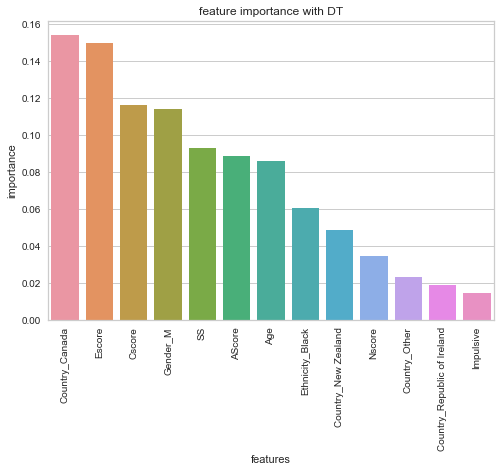

In [44]:
dt_model.fit(X_dev_ori, y_dev_ori)
ca_feature_names=preprocess.named_transformers_["onehotencoder"].get_feature_names_out().tolist()
other_feature=['Age',"Education"]
feature_names=numerical_feature+ca_feature_names+other_feature
#print(feature_names)
feat_imps=zip(feature_names,dt_model.feature_importances_)
# print(best_tree.feature_importances_)
feats,imps=zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)),key=lambda x: x[1], reverse=True)))
ax=sns.barplot(list(feats),list(imps))
ax.tick_params(axis='x',rotation=90)
ax.set_xlabel('features')
ax.set_ylabel("importance")
ax.set_title("feature importance with DT")

[Text(0.5, 1.0, 'Confusion matrix With DT')]

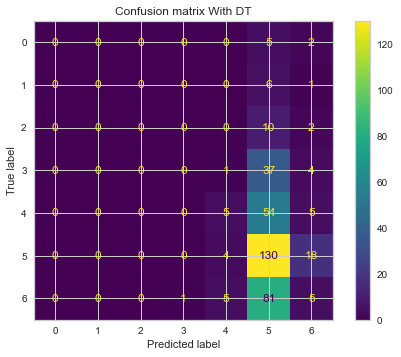

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
y_pred=dt_model.predict(X_test_ori)
cm=confusion_matrix(y_test_ori, y_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()
disp.ax_.set(title='Confusion matrix With DT')

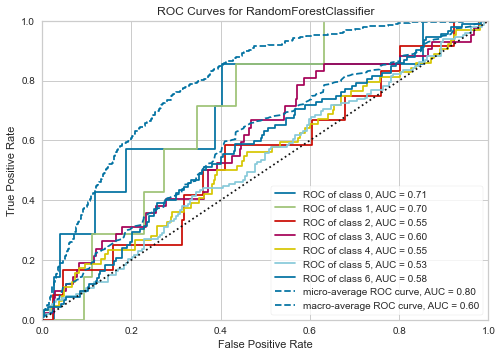

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [31]:
rf_best = RandomForestClassifier(n_estimators = 300, 
                                min_samples_split = 2,
                                min_samples_leaf = 2,
                                max_features = 'sqrt',
                                max_depth = 52,
                                bootstrap = 'False',
                                random_state = 42)
visualizer = ROCAUC(rf_best, classes=["0", "1", "2","3","4","5","6"])
ori_df_X = df_ori_alcohol[:,:22]
ori_df_y = df_ori_alcohol[:,-1]
X_dev_ori,X_test_ori,y_dev_ori,y_test_ori = split(ori_df_X, ori_df_y)
visualizer.fit(X_dev_ori, y_dev_ori)        # Fit the training data to the visualizer
visualizer.score(X_test_ori, y_test_ori)        # Evaluate the model on the test data
visualizer.show()   

Text(0.5, 1.0, 'feature importance with RF')

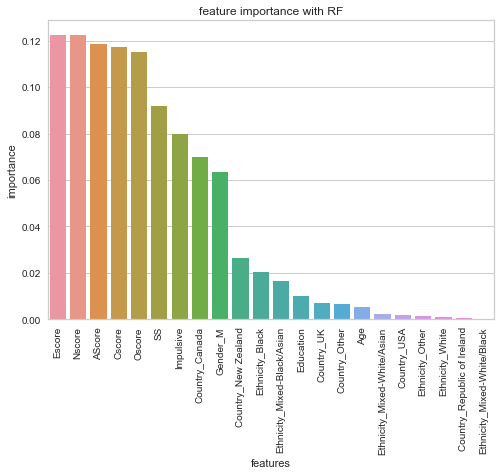

In [47]:
rf_best.fit(X_dev_ori, y_dev_ori)
ca_feature_names=preprocess.named_transformers_["onehotencoder"].get_feature_names_out().tolist()
other_feature=['Age',"Education"]
feature_names=numerical_feature+ca_feature_names+other_feature
#print(feature_names)
feat_imps=zip(feature_names,rf_best.feature_importances_)
# print(best_tree.feature_importances_)
feats,imps=zip(*(sorted(list(filter(lambda x: x[1] != 0, feat_imps)),key=lambda x: x[1], reverse=True)))
ax=sns.barplot(list(feats),list(imps))
ax.tick_params(axis='x',rotation=90)
ax.set_xlabel('features')
ax.set_ylabel("importance")
ax.set_title("feature importance with RF")

[Text(0.5, 1.0, 'Confusion matrix With RF')]

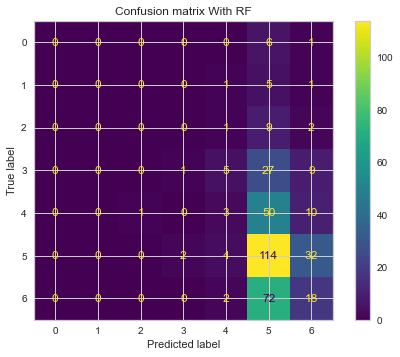

In [46]:
y_pred=rf_best.predict(X_test_ori)
cm=confusion_matrix(y_test_ori, y_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()
disp.ax_.set(title='Confusion matrix With RF')

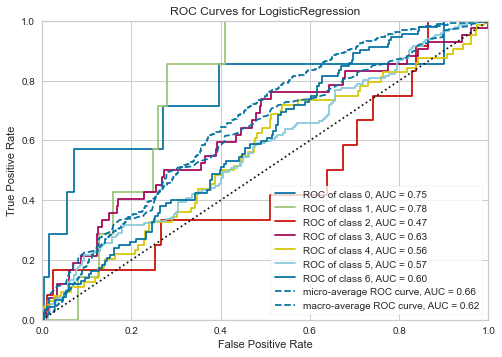

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [36]:
logistic_ori = LogisticRegression(C = 2.906, \
                                  random_state = 0,max_iter=1000,class_weight='balanced')
visualizer = ROCAUC(logistic_ori, classes=["0", "1", "2","3","4","5","6"])
ori_df_X = df_ori_alcohol[:,:22]
ori_df_y = df_ori_alcohol[:,-1]
X_dev_ori,X_test_ori,y_dev_ori,y_test_ori = split(ori_df_X, ori_df_y)
visualizer.fit(X_dev_ori, y_dev_ori)        # Fit the training data to the visualizer
visualizer.score(X_test_ori, y_test_ori)        # Evaluate the model on the test data
visualizer.show()   

[Text(0.5, 1.0, 'Confusion matrix With Logistic')]

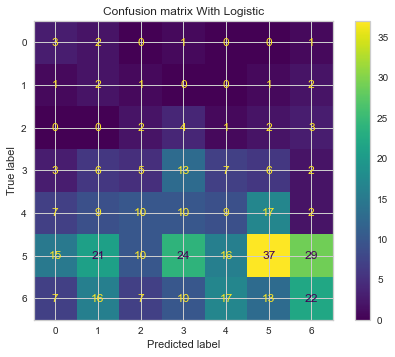

In [49]:
y_pred=logistic_ori.predict(X_test_ori)
cm=confusion_matrix(y_test_ori, y_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()
disp.ax_.set(title='Confusion matrix With Logistic')